In [21]:
from library_new import *

# Mid-sem Exam, Ritabik Banerjee-2011127

# 1.

In [22]:
import math

# Define the function
def equation(x):
    return math.log(x / 2) - math.sin(5 * x / 2)

# Initial interval
a = 1.5
b = 2.5

# Solve using Regula-Falsi
root_rf, iterations_rf = regula_falsi(equation, a, b)
print(f"Regula-Falsi method: Root = {root_rf}, Iterations = {iterations_rf}")

Regula-Falsi method: Root = 2.6231403379360847, Iterations = 9


In [23]:
def equation_prime(x):
    return 1 / (2 * x) - (5 / 2) * math.cos(5 * x / 2)

# Initial guess
x0 = 2.5

# Solve using Newton-Raphson
root_nr, iterations_nr = newton_raphson(equation, equation_prime, x0)
print(f"Newton-Raphson method: Root = {root_nr}, Iterations = {iterations_nr}")


Newton-Raphson method: Root = 2.6231403305142753, Iterations = 7


# Here we see the number of iterations taken by newton-rhapson are less than the Regula-falsi algorithm of finding roots.

# 2.

The length of the rod where the temperature is 100 degree is = 4.5


Text(0, 0.5, 'Temperature (Degree)')

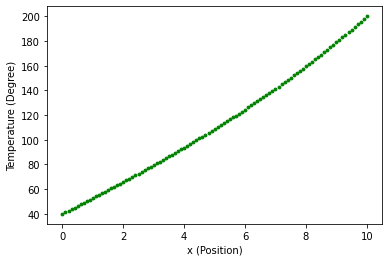

In [28]:
def dtdx_2(x, t, z):
    return -0.01*(20-t)

def dtdx(x, t, z):
    return z

x = 0
T = 40
x_f = 10
T_f = 200
h = 0.1
tolerance = 1e-3

X_, T_ = RKshooting_method(dtdx_2, dtdx, x, T, x_f, T_f, 10, 100, h, tolerance)
for i in range(len(T_)):
    if T_[i] >= 100:
        post = i
        break     
print("The length of the rod where the temperature is 100 degree is =", X_[post])

plt.scatter(X_, T_, color='green', s=8)
plt.xlabel('x (Position)')
plt.ylabel('Temperature (Degree)')


# 3.

In [38]:
import matplotlib.pyplot as plt

def heat_equation(T, l_x, n_x, l_t, n_t):
    h_x = l_x / n_x
    h_t = l_t / n_t
    alpha = h_t / (h_x ** 2)
    H0 = [0 for i in range(n_x + 1)]
    H1 = [0 for i in range(n_x + 1)]
    a = []

    if alpha < 0.5:
        for i in range(n_x + 1):
            H0[i] = T(n_x, i)
            a.append(i * h_x)

    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']

    for j in range(0, n_t + 1):
        for i in range(1, n_x):
            if i == 0:
                H1[i] = (1 - 2 * alpha) * H0[i] + alpha * H0[i + 1]
            elif i == n_x:
                H1[i] = alpha * H0[i - 1] + (1 - 2 * alpha) * H0[i]
            else:
                H1[i] = alpha * H0[i - 1] + (1 - 2 * alpha) * H0[i] + alpha * H0[i + 1]

        for i in range(1, n_x):
            H0[i] = H1[i]

        if j == 0 or j == 5 or j == 10 or j == 50 or j == 100 or j == 500 or j == n_t:
            plt.plot(a, H0, label=f'Time step {j}', color=colors.pop(0))

    plt.xlabel('x')
    plt.ylabel('T')
    plt.legend()
    plt.show()

def T(n_x, i):
    if i == n_x // 2:
        T = 300
    else:
        T = 0
    return T


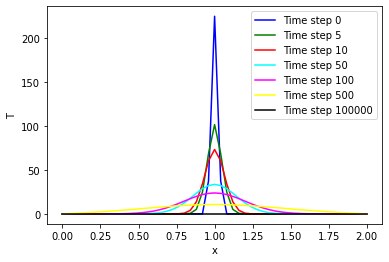

In [39]:
heat_equation(T, 2, 50, 20, 100000)

# Here is the solution of the 1-dimensional heat equation over a conducting bar.

# 4.

In [18]:
import numpy as np

def linear_mass_density(x):
    return x**2

def center_of_mass_numerical(lambda_function, length, num_steps=1000):
    delta_x = length / num_steps
    x_values = np.linspace(0, length, num_steps + 1)
    
    numerator = sum(x * lambda_function(x) for x in x_values)
    denominator = sum(lambda_function(x) for x in x_values)
    
    center_of_mass = numerator / denominator
    
    return center_of_mass

length_of_beam = 2.0
result = center_of_mass_numerical(linear_mass_density, length_of_beam)

print(f"The center of mass is approximately {result:.4f} meters from one end.")


The center of mass is approximately 1.5007 meters from one end.


# 5.

In [54]:
A = np.loadtxt('matrix_lu.txt')
B = np.loadtxt('matrix_lu1.txt')

# Solve the system using LU decomposition
solution = lu_decomposition_solve(A, B, len(B))

# Print the solution
print("Solution for variables a1, a2, a3, a4, a5, a6:")
print(solution)

Solution for variables a1, a2, a3, a4, a5, a6:
[-1.76181704  0.89622803  4.0519314  -1.6171308   2.04191354  0.15183249]
